In [1]:
  ## library import
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import numpy as np
import os
import re
from PIL import Image
from tqdm import tqdm_notebook
import shutil
from sklearn.model_selection import train_test_split
import random
import matplotlib.pyplot as plt
from glob import glob
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing import image

In [ ]:
#! pip install gdown

In [2]:
import gdown

In [3]:
url = 'https://drive.google.com/uc?id=1wbgdPotquifKn7k7WQrcQ-CUowpWeV_n'
fname = 'dog_classifier2.zip'
gdown.download(url, fname, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1wbgdPotquifKn7k7WQrcQ-CUowpWeV_n
To: /content/dog_classifier2.zip
100%|██████████| 262M/262M [00:02<00:00, 94.0MB/s]


'dog_classifier2.zip'

In [4]:
os.listdir()

['.config', 'dog_classifier2.zip', 'sample_data']

In [5]:
!unzip -q dog_classifier2.zip -d dog_classifier2

In [6]:
os.getcwd()

'/content'

In [7]:
train_paths = glob('/content/dog_classifier2/train/*')
val_paths = glob('/content/dog_classifier2/validation/*')
test_paths = glob('/content/dog_classifier2/test/*')

In [8]:
train_paths[:10]

['/content/dog_classifier2/train/d_222.png',
 '/content/dog_classifier2/train/d_462.png',
 '/content/dog_classifier2/train/dog.611.png',
 '/content/dog_classifier2/train/d_475.png',
 '/content/dog_classifier2/train/dog.633.png',
 '/content/dog_classifier2/train/d_117.PNG',
 '/content/dog_classifier2/train/d_252.png',
 '/content/dog_classifier2/train/dog.131.png',
 '/content/dog_classifier2/train/dog.449.png',
 '/content/dog_classifier2/train/dog.249.png']

In [9]:
# train set
class_list = []
cnt = 0
for path in train_paths:
  fname = os.path.basename(path)
  if '.PNG' in fname:
    cls_name = fname.replace('.PNG', '')
  else:
    cls_name = fname.replace('.png', '')
  if '.' in cls_name:
    class_name = cls_name.split('.')[0]
    class_list.append(class_name)
  else:
    class_name = cls_name.split('_')[0]
    class_list.append(class_name)
  cnt += 1
print(len(class_list))

# val set
val_class_list = []
cnt = 0
for path in val_paths:
  fname = os.path.basename(path)
  if '.PNG' in fname:
    cls_name = fname.replace('.PNG', '')
  else:
    cls_name = fname.replace('.png', '')
  if '.' in cls_name:
    class_name = cls_name.split('.')[0]
    val_class_list.append(class_name)
  else:
    class_name = cls_name.split('_')[0]
    val_class_list.append(class_name)
  cnt += 1
print(len(val_class_list))

# test set
test_class_list = []
cnt = 0
for path in test_paths:
  fname = os.path.basename(path)
  if '.PNG' in fname:
    cls_name = fname.replace('.PNG', '')
  else:
    cls_name = fname.replace('.png', '')
  if '.' in cls_name:
    class_name = cls_name.split('.')[0]
    test_class_list.append(class_name)
  else:
    class_name = cls_name.split('_')[0]
    test_class_list.append(class_name)
  cnt += 1
print(len(test_class_list))

800
200
200


In [10]:
uniques = np.unique(class_list, return_counts=True)
uniques

(array(['d', 'dog'], dtype='<U3'), array([400, 400]))

In [11]:
train_data = {'name':train_paths, 'class':class_list}
train_df = pd.DataFrame(train_data)

val_data = {'name':val_paths, 'class':val_class_list}
val_df = pd.DataFrame(val_data)

test_data = {'name':test_paths, 'class':test_class_list}
test_df = pd.DataFrame(test_data)

In [12]:
train_csv_path = 'train_dataset.csv'
val_csv_path = 'val_dataset.csv'
test_csv_path = 'test_dataset.csv'

In [13]:
train_df.to_csv(train_csv_path, index=False)
val_df.to_csv(val_csv_path, index=False)
test_df.to_csv(test_csv_path, index=False)

In [14]:
train_df = pd.read_csv('train_dataset.csv')
train_df.head()

,name,class
0,/content/dog_classifier2/train/d_222.png,d
1,/content/dog_classifier2/train/d_462.png,d
2,/content/dog_classifier2/train/dog.611.png,dog
3,/content/dog_classifier2/train/d_475.png,d
4,/content/dog_classifier2/train/dog.633.png,dog


In [15]:
val_df = pd.read_csv('val_dataset.csv')
val_df.tail()

,name,class
195,/content/dog_classifier2/validation/d_367.png,d
196,/content/dog_classifier2/validation/d_188.PNG,d
197,/content/dog_classifier2/validation/dog.774.png,dog
198,/content/dog_classifier2/validation/dog.842.png,dog
199,/content/dog_classifier2/validation/d_378.png,d


In [16]:
test_df = pd.read_csv('test_dataset.csv')
test_df.head()

,name,class
0,/content/dog_classifier2/test/d_335.png,d
1,/content/dog_classifier2/test/d_138.PNG,d
2,/content/dog_classifier2/test/dog.1082.png,dog
3,/content/dog_classifier2/test/dog.1003.png,dog
4,/content/dog_classifier2/test/dog.1002.png,dog


In [17]:
train_datagen = ImageDataGenerator(
        rescale=1./255.,
        width_shift_range=0.3,
        zoom_range=0.3,
        horizontal_flip=True)

val_datagen = ImageDataGenerator(rescale=1./255.)

test_datagen = ImageDataGenerator(rescale=1./255.)

In [24]:
IMG_SIZE = 224
# Hyper Parameter

num_epochs = 60
batch_size = 32

learning_rate = 0.001

dropout_rate = 0.7

input_shape = (224, 224, 3)

steps_per_epoch = len(class_list)/batch_size

num_classes = 2

In [19]:
train_generator = train_datagen.flow_from_dataframe(
        train_df,
        x_col = 'name',
        y_col = 'class',
        target_size=input_shape[:2],
        batch_size=batch_size,
        class_mode='categorical'
)

validation_generator = val_datagen.flow_from_dataframe(
        val_df,
        x_col = 'name',
        y_col = 'class',
        target_size=input_shape[:2],
        batch_size=batch_size,
        class_mode='categorical'
)

test_generator = test_datagen.flow_from_dataframe(
        test_df,
        x_col = 'name',
        y_col = 'class',
        target_size=input_shape[:2],
        batch_size=batch_size,
        class_mode='categorical'
)

Found 800 validated image filenames belonging to 2 classes.
Found 200 validated image filenames belonging to 2 classes.
Found 200 validated image filenames belonging to 2 classes.


# Model

In [20]:
from tensorflow.keras.applications.densenet import DenseNet121
from tensorflow.keras import models
from tensorflow.keras.layers import Conv2D, ReLU, MaxPooling2D, Dense, BatchNormalization, GlobalAveragePooling2D

In [21]:
# densenet = DenseNet121(weights='imagenet', include_top=False, input_shape=(IMG_SIZE, IMG_SIZE, 3))

29097984/29084464 [==============================] - 0s 0us/step


In [74]:
def create_dense_model2():
  densenet = DenseNet121(weights='imagenet', include_top=False, input_shape=(IMG_SIZE, IMG_SIZE, 3))
  gap = GlobalAveragePooling2D()(densenet.output)  # input이 무엇인지 넣어줘야 함.
  net = Dense(1024)(gap)
  net = BatchNormalization()(net)
  net = ReLU(name='out_relu')(net)
  output = Dense(num_classes, activation='softmax', name='output_layer')(net)  # 이름을 정해줌.
  return keras.Model(inputs=densenet.input, outputs=output)

In [75]:
model = create_dense_model2()

LR_INIT = 0.00001
LR_MAX = 0.0002
LR_MIN = LR_INIT
RAMPUP_EPOCH = 4  # 4epoch만에 learning_rate이 최대치로 상승하고 다시 감소
EXP_DECAY = 0.9

def lr_schedule_fn(epoch):
    if epoch < RAMPUP_EPOCH:
        lr = (LR_MAX - LR_MIN) / RAMPUP_EPOCH * epoch + LR_INIT
    else:
        lr = (LR_MAX - LR_MIN) * EXP_DECAY**(epoch - RAMPUP_EPOCH)
    return lr

lr_callback = keras.callbacks.LearningRateScheduler(lr_schedule_fn)

model.compile(optimizer=tf.keras.optimizers.Adam(LR_INIT),
              loss=tf.keras.losses.CategoricalCrossentropy(label_smoothing=0.1),
              metrics=['accuracy'])
model.summary()

Model: "model_7"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
zero_padding2d_6 (ZeroPadding2D (None, 230, 230, 3)  0           input_4[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 112, 112, 64) 9408        zero_padding2d_6[0][0]           
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1/conv[0][0]                 
____________________________________________________________________________________________

In [76]:
history2 = model.fit_generator(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=num_epochs,
    validation_data=validation_generator,
    validation_steps=len(validation_generator),
    callbacks=[lr_callback]
)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/60
25/25 [==============================] - 38s 993ms/step - loss: 0.6898 - accuracy: 0.6263 - val_loss: 0.7209 - val_accuracy: 0.5750
Epoch 2/60
25/25 [==============================] - 22s 872ms/step - loss: 0.3907 - accuracy: 0.8913 - val_loss: 0.6100 - val_accuracy: 0.7150
Epoch 3/60
25/25 [==============================] - 22s 874ms/step - loss: 0.2834 - accuracy: 0.9650 - val_loss: 0.5106 - val_accuracy: 0.7850
Epoch 4/60
25/25 [==============================] - 22s 872ms/step - loss: 0.2532 - accuracy: 0.9862 - val_loss: 0.4150 - val_accuracy: 0.8700
Epoch 5/60
25/25 [==============================] - 22s 876ms/step - loss: 0.2341 - accuracy: 0.9937 - val_loss: 0.3695 - val_accuracy: 0.9100
Epoch 6/60
25/25 [==============================] - 22s 874ms/step - loss: 0.2318 - accuracy: 0.9950 - val_loss: 0.3136 - val_accuracy: 0.9450
Epoch 7/60
25/25 [==============================] - 22s 876ms/step - loss: 0.2270 - accuracy: 0.9962 - val_loss: 0.3196 - val_accuracy: 0.9500

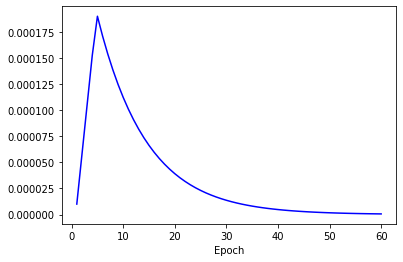

In [77]:
def plot_lr():
    lr = []
    epoch_list = list(np.arange(num_epochs) + 1)
    for epoch in range(num_epochs):
        lr.append(lr_schedule_fn(epoch))    
    plt.plot(epoch_list, lr, 'b-')
    plt.xlabel('Epoch')
    plt.show()

plot_lr()  # 학습율의 그림 0과 가깝다가 급격히 증가하고 decay

## 예전 Model

In [ ]:
def create_dense_model():
    model = models.Sequential()
    model.add(densenet)
    model.add(GlobalAveragePooling2D())
    model.add(Dense(256))
    model.add(BatchNormalization())
    model.add(ReLU())
    model.add(Dense(num_classes, activation='softmax'))
    return model

In [ ]:
## Create model, compile & summary
model = create_dense_model()

LR_INIT = 0.0001
LR_MAX = 0.001
LR_MIN = LR_INIT
RAMPUP_EPOCH = 4  # 4epoch만에 learning_rate이 최대치로 상승하고 다시 감소
EXP_DECAY = 0.9

def lr_schedule_fn(epoch):
    if epoch < RAMPUP_EPOCH:
        lr = (LR_MAX - LR_MIN) / RAMPUP_EPOCH * epoch + LR_INIT
    else:
        lr = (LR_MAX - LR_MIN) * EXP_DECAY**(epoch - RAMPUP_EPOCH)
    return lr

lr_callback = keras.callbacks.LearningRateScheduler(lr_schedule_fn)

model.compile(optimizer=tf.keras.optimizers.Adam(LR_INIT),
              loss=tf.keras.losses.CategoricalCrossentropy(label_smoothing=0.1),
              metrics=['accuracy'])
model.summary()

NameError: ignored

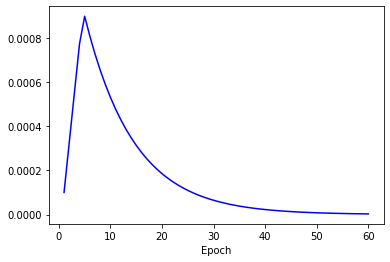

In [ ]:
def plot_lr():
    lr = []
    epoch_list = list(np.arange(num_epochs) + 1)
    for epoch in range(num_epochs):
        lr.append(lr_schedule_fn(epoch))    
    plt.plot(epoch_list, lr, 'b-')
    plt.xlabel('Epoch')
    plt.show()

plot_lr()  # 학습율의 그림 0과 가깝다가 급격히 증가하고 decay

In [ ]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=num_epochs,
    validation_data=validation_generator,
    validation_steps=len(validation_generator),
    callbacks=[lr_callback, tensorboard]
)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/60
25/25 [==============================] - 74s 1s/step - loss: 0.4419 - accuracy: 0.8450 - val_loss: 0.6621 - val_accuracy: 0.7000
Epoch 2/60
25/25 [==============================] - 22s 854ms/step - loss: 0.2768 - accuracy: 0.9737 - val_loss: 0.5128 - val_accuracy: 0.8300
Epoch 3/60
25/25 [==============================] - 22s 860ms/step - loss: 0.2684 - accuracy: 0.9712 - val_loss: 0.5790 - val_accuracy: 0.7800
Epoch 4/60
25/25 [==============================] - 22s 878ms/step - loss: 0.2883 - accuracy: 0.9588 - val_loss: 1.4532 - val_accuracy: 0.5300
Epoch 5/60
25/25 [==============================] - 22s 878ms/step - loss: 0.3465 - accuracy: 0.9187 - val_loss: 2.5657 - val_accuracy: 0.5050
Epoch 6/60
25/25 [==============================] - 22s 873ms/step - loss: 0.3539 - accuracy: 0.9025 - val_loss: 2.2491 - val_accuracy: 0.5700
Epoch 7/60
25/25 [==============================] - 22s 869ms/step - loss: 0.3178 - accuracy: 0.9375 - val_loss: 0.5975 - val_accuracy: 0.8050
Ep

# Test

In [78]:
new_model = history2.model

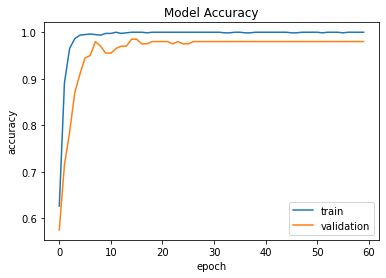

In [79]:
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title("Model Accuracy")
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'])
plt.show()

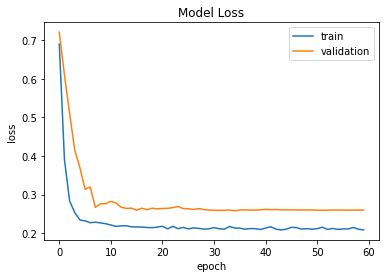

In [80]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'])
plt.show()

In [81]:
test_image, test_label = next(iter(test_generator))
test_image.shape

(32, 224, 224, 3)

In [82]:
eval = model.evaluate(test_image, test_label)
eval

1/1 [==============================] - 2s 2s/step - loss: 0.2566 - accuracy: 0.9688


[0.2566371262073517, 0.96875]

1/1 [==============================] - 0s 237ms/step - loss: 0.2424 - accuracy: 1.0000


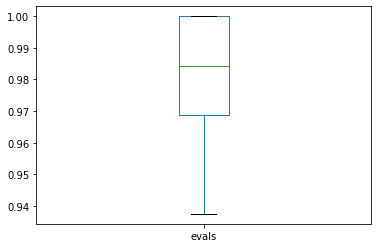

In [84]:
evals = []
for i in range(20):
  test_image, test_label = next(iter(test_generator))
  eval = model.evaluate(test_image, test_label)
  evals.append(eval[1])

dict1 = {'evals':evals}
test_eval = pd.DataFrame(dict1)
test_eval.plot(kind='box', y='evals')

In [ ]:
pred = model.predict(test_image)
pred.shape

(32, 2)

In [ ]:
pred[0]

array([0.06985413, 0.93014586], dtype=float32)

In [ ]:
pred_class = np.argmax(pred, axis=1)
pred_class

# Feature Map

In [85]:
image, label = next(iter(train_generator))
image.shape

(32, 224, 224, 3)

In [87]:
first_output = model.layers[2].output
conv_layer = tf.keras.models.Model(inputs=model.input, outputs=first_output)
output = conv_layer(image)

In [88]:
weight = conv_layer.get_weights()
len(weight)

1

In [90]:
weight[0].shape

(7, 7, 3, 64)

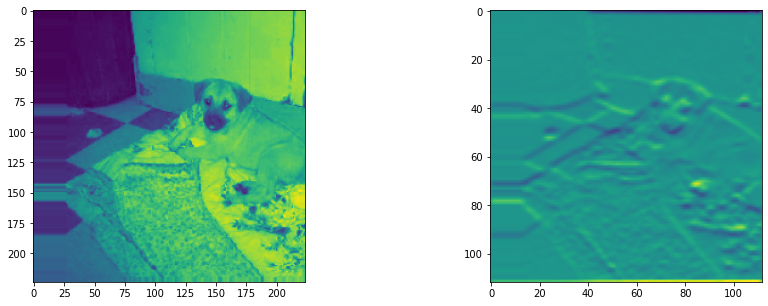

In [91]:
plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.imshow(image[0, :, :, 0])
plt.subplot(1, 2, 2)
plt.imshow(output[0, :, :, 0])
plt.show()

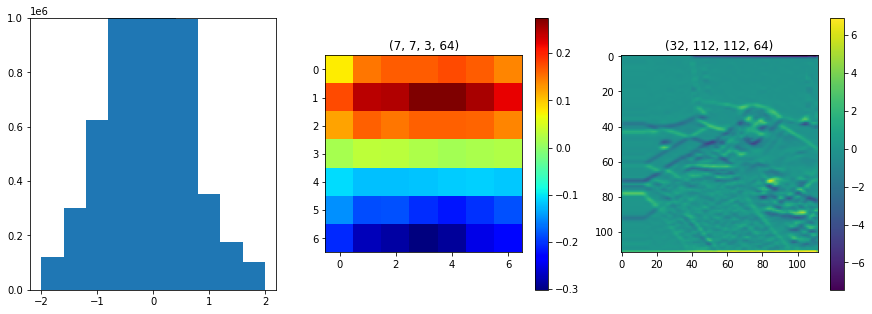

In [92]:
plt.figure(figsize=(15,5))

plt.subplot(1, 3, 1)
plt.hist(output.numpy().ravel(), range=[-2, 2])
plt.ylim(0, 1000000)

plt.subplot(1, 3, 2)
plt.title(weight[0].shape)              # weight의 모양 7 by 7
plt.imshow(weight[0][:,:,0,0], 'jet')
plt.colorbar()

plt.subplot(1, 3, 3)
plt.title(output.shape)
plt.imshow(output[0, :, :, 0])
plt.colorbar()
plt.show()

In [54]:
# visualize feature maps output from each block in the vgg model
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import Model
from matplotlib import pyplot
import matplotlib.pyplot as plt
from numpy import expand_dims


In [56]:
train_paths[:10]

['/content/dog_classifier2/train/d_222.png',
 '/content/dog_classifier2/train/d_462.png',
 '/content/dog_classifier2/train/dog.611.png',
 '/content/dog_classifier2/train/d_475.png',
 '/content/dog_classifier2/train/dog.633.png',
 '/content/dog_classifier2/train/d_117.PNG',
 '/content/dog_classifier2/train/d_252.png',
 '/content/dog_classifier2/train/dog.131.png',
 '/content/dog_classifier2/train/dog.449.png',
 '/content/dog_classifier2/train/dog.249.png']

In [58]:
path1 = train_paths[0]
path2 = train_paths[2]
path1, path2

('/content/dog_classifier2/train/d_222.png',
 '/content/dog_classifier2/train/dog.611.png')

In [69]:
gfile = tf.io.read_file(path)
image1 = load_img(path1, target_size=(224, 224))
image2 = load_img(path2, target_size=(224, 224))

In [70]:
img1 = np.expand_dims(image1, 0)
img2 = np.expand_dims(image2, 0)

In [71]:
def load_image(img_path, target_size):
    img = tf.keras.preprocessing.image.load_img(img_path, target_size=target_size)
    img_tensor = tf.keras.preprocessing.image.img_to_array(img)

    # 배치 사이즈 추가 + 스케일링 결과 반환
    return img_tensor[np.newaxis] / 255.     # (1, 224, 224, 3)


# 첫 번째 등장하는 컨볼루션 레이어의 모든 피처맵(32개) 출력
def show_first_feature_map(loaded_model, img_path):
    first_output = loaded_model.layers[2].output
    print(first_output.shape, first_output.dtype)   # (?, 222, 222, 64) <dtype: 'float32'>

    # 1개의 출력을 갖는 새로운 모델 생성
    model = tf.keras.models.Model(inputs=loaded_model.input, outputs=first_output)

    # 입력으로부터 높이와 너비를 사용해서 target_size에 해당하는 튜플 생성
    target_size = (loaded_model.input.shape[1], loaded_model.input.shape[2])
    img_tensor = load_image(img_path, target_size)

    print(loaded_model.input.shape)     # (?, 224, 224, 3)
    print(img_tensor.shape)             # (1, 224, 224, 3)

    first_activation = model.predict(img_tensor)

    # 컨볼루션 레이어에서 필터 크기(3), 스트라이드(1), 패딩(valid)을 사용했기 때문에
    # 150에서 148로 크기가 일부 줄었음을 알 수 있다. 필터 개수는 32.
    print(first_activation.shape)       # (1, 222, 222, 64)
    print(first_activation[0, 0, 0])    # [0.00675746 0. 0.02397328 0.03818807 0. ...]

    # 19번째 활성 맵 출력. 기본 cmap은 viridis. gray는 흑백 컬러맵.
    # [0, :, :, feature_index]
    # 0은 첫 번째 데이터(원본 이미지)의 피처맵을 가리킨다. 사진은 1장만 사용했기 때문에 0만 가능
    # 가운데 콜론(:)은 높이와 너비를 가리키는 차원의 모든 데이터
    # feature_index는 보고 싶은 피처맵이 있는 채널을 가리킨다.
    # 32개의 필터를 사용했다면 0부터 31까지의 피처맵이 존재한다.
    plt.figure(figsize=(16, 8))
    for i in range(first_activation.shape[-1]):
        plt.subplot(8, 8, i + 1)

        # 눈금 제거. fignum은 같은 피켜에 연속 출력
        plt.axis('off')
        plt.matshow(first_activation[0, :, :, i], cmap='gray', fignum=0)
    plt.tight_layout()
    plt.show()

(None, 112, 112, 64) <dtype: 'float32'>
(None, 224, 224, 3)
(1, 224, 224, 3)
(1, 112, 112, 64)
[-3.44540286e+00 -1.53441280e-01  1.21313006e-01 -2.90038675e-01
  7.55143985e-02  3.20407701e+00 -1.71385318e-01 -2.69830853e-01
  1.88301314e-07  5.73698997e-01 -3.42384362e+00 -7.84518182e-01
 -8.40997696e-01  1.90616354e-01 -2.69776851e-01 -2.46837658e-07
  3.33049059e-01 -2.16501787e-01 -1.77080497e-01  2.09971026e-01
  3.14918965e-01  1.72011331e-01  1.39539266e+00 -1.53055489e-01
  1.03062356e+00 -4.49030697e-01  7.63879567e-02  7.87423253e-01
  3.04255784e-01  3.18574876e-01 -5.49101233e-01 -5.48849255e-02
  2.22122923e-01 -6.97629079e-02  3.18745232e+00 -1.02614775e-01
 -3.36795822e-02 -4.45644408e-01 -3.78176332e-01  4.39395577e-01
  5.59699655e-01  1.88281596e-01 -1.00509979e-01 -2.08385065e-01
  1.09110706e-01 -1.77975819e-01 -6.39514148e-01 -2.23605469e-01
 -2.80815452e-01  6.19236939e-02 -4.08367038e-01 -1.34522274e-01
 -6.51942551e-01 -5.92345595e-01 -3.18559706e-01  1.27009794

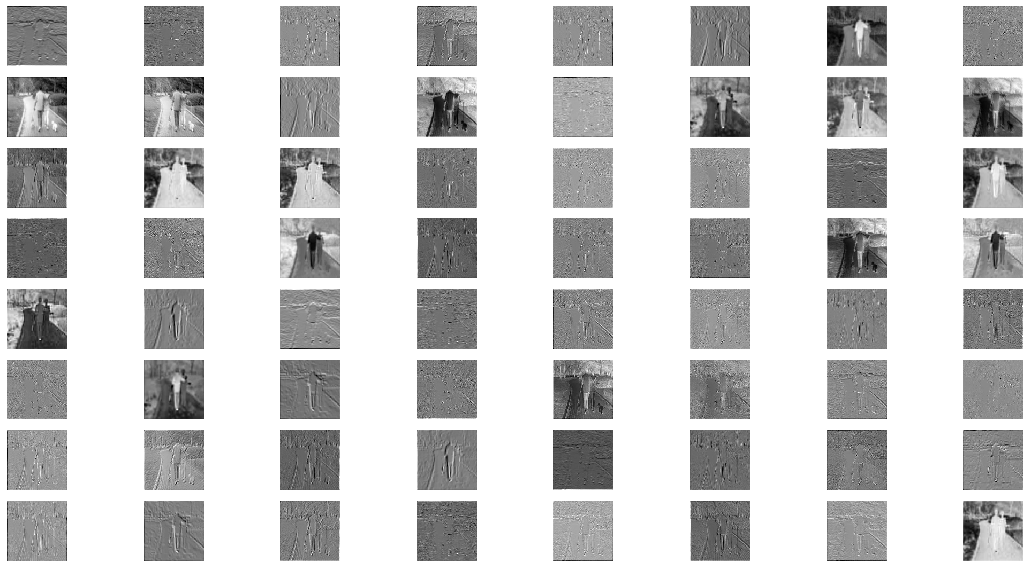

In [72]:
show_first_feature_map(model, path1)

(None, 112, 112, 64) <dtype: 'float32'>
(None, 224, 224, 3)
(1, 224, 224, 3)
(1, 112, 112, 64)
[-6.6394839e+00 -4.7508723e-01  3.4221512e-01 -1.5474930e+00
  8.5770123e-02  5.8444471e+00 -4.3602383e-01 -6.8076128e-01
  4.2466758e-07  1.2997186e+00 -6.2944732e+00 -1.5514735e+00
 -2.4047954e+00 -1.4480544e-03  9.7181201e-02 -5.6602317e-07
  9.8380810e-01 -2.9085182e-02  8.8219613e-02 -2.4264294e-01
  1.3190807e+00  7.1527141e-01  3.4613276e+00 -1.9725090e-01
  2.5923269e+00 -6.0166609e-01  2.5683752e-01  2.3353305e+00
  3.0748296e-01  6.7034882e-01 -1.4940281e+00  1.2172518e-01
  2.4659273e-03  2.8752238e-01  6.1185088e+00 -8.8607930e-02
  3.5394874e-01 -5.8708555e-01  2.1025409e-01  2.1715803e+00
  9.7196692e-01 -1.6468121e-01  2.1283926e-01  3.6475468e-01
  4.2010099e-02 -1.5474485e+00 -1.9796829e+00  1.4522834e-02
 -1.6732377e+00  6.6612345e-01  7.1467221e-02  4.0361398e-01
 -6.4384237e-02 -6.2129295e-01 -1.6326096e+00 -2.2023076e-01
 -2.0306847e+00 -1.8895823e-01 -1.8918492e+00  2.35

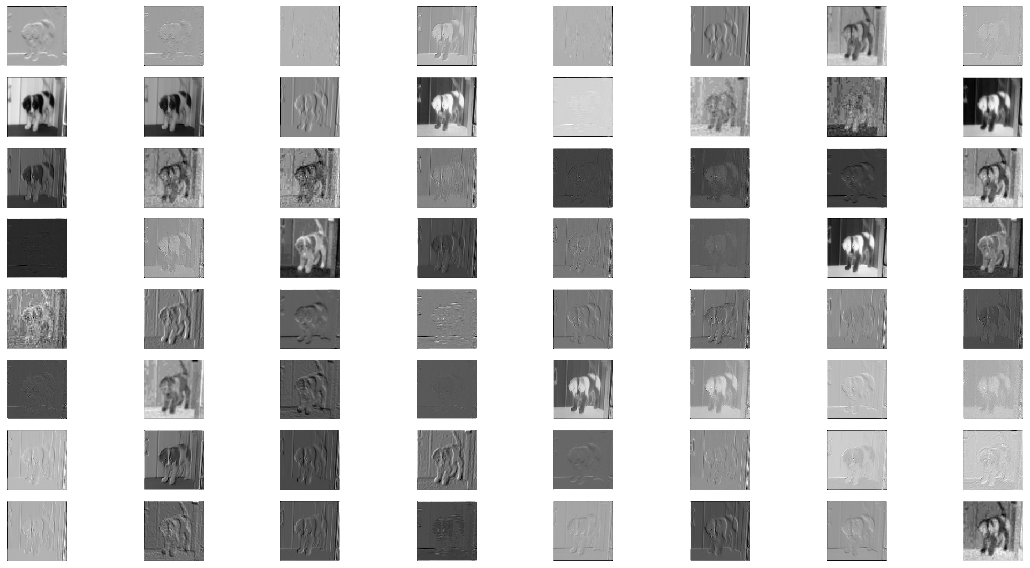

In [73]:
show_first_feature_map(model, path2)

## Activation Map

In [ ]:
target_fmap = model.get_layer(name='relu').output
new_model = keras.models.Model(model.input, target_fmap)

In [ ]:
weights = model.get_layer(name='output_layer').get_weights()[0]

In [ ]:
weights.shape

(1024, 2)

In [ ]:
url2 = 'https://drive.google.com/uc?id=1osb46F6VkUXIGeCh1wAjUU4B-HCNAhq6'
fname2 = 'dog_classifier3.zip'
gdown.download(url2, fname2, quiet=False)

In [ ]:
!unzip -q dog_classifier3.zip -d dog_classifier3

In [ ]:
## directory 설정
cur_dir = os.getcwd()
data_dir = os.path.join(cur_dir, 'dog_classifier3')
image_dir = os.path.join(data_dir, 'images')

In [ ]:
## image file 수 확인
image_files = [fname for fname in os.listdir(image_dir)]
print(len(image_files))

In [ ]:
# class 정의
class_list2 = set()
for image_file in image_files:
    file_name = os.path.splitext(image_file)[0]  # 확장자 제거
    if '_' in file_name:
        class_name = re.sub('_\d+', '', file_name)
    else:
        class_name = re.sub('.\d+', '', file_name)
    class_list2.add(class_name)
class_list2 = list(class_list2)
print(len(class_list2))

In [ ]:
images, labels = next(iter(validation_generator))

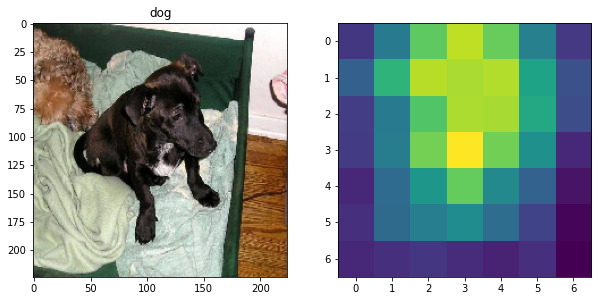

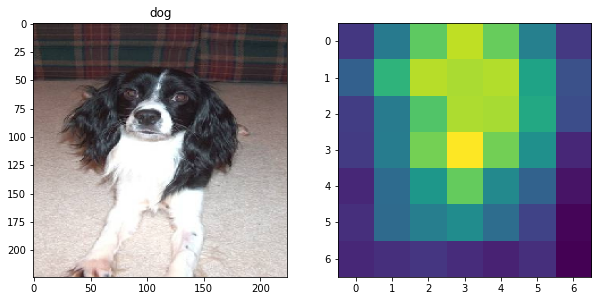

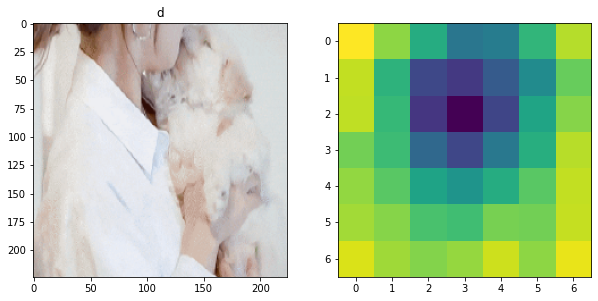

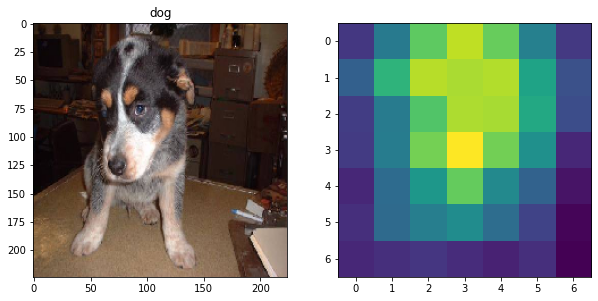

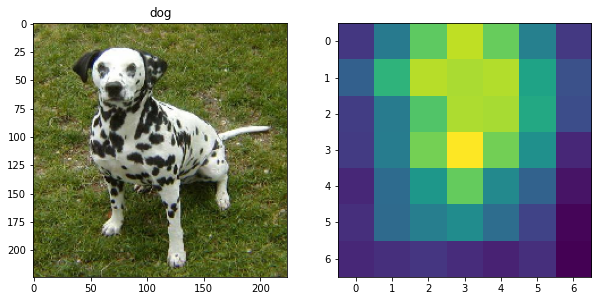

In [ ]:
for i in range(5):
  plt.figure(figsize=(10,6))

# 왼쪽 그림
  plt.subplot(1,2,1)
  plt.imshow(images[i])
  prediction = model.predict(images[:5])
  pred_class = np.argmax(prediction[i], -1)
  title = class_list2[pred_class]  # 예측된 class의 index를 넣어 class이름으로 바꿈
  plt.title(title)

# 오른쪽 그림 : 각 위치의 weight의 크기를 평균으로 영향력이 큰 위치를 보여줌.
  plt.subplot(1,2,2)
  fmap = new_model(images[:5])
  weights_cam = weights[:,pred_class]
  camsum = np.zeros((7,7))
  for j in range(1024):
    camsum += weights_cam[j]*fmap[0,:,:,j]
  camsum = camsum / 1024
  plt.imshow(camsum)
  
  plt.show()

# 볼 필요없는 개인공부

In [ ]:
url2 = 'https://drive.google.com/uc?id=1osb46F6VkUXIGeCh1wAjUU4B-HCNAhq6'
fname2 = 'dog_classifier3.zip'
gdown.download(url2, fname2, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1osb46F6VkUXIGeCh1wAjUU4B-HCNAhq6
To: /content/dog_classifier3.zip
100%|██████████| 262M/262M [00:02<00:00, 92.0MB/s]


'dog_classifier3.zip'

In [ ]:
!unzip -q dog_classifier3.zip -d dog_classifier3

In [ ]:
os.listdir('/content/')

['.config',
 'train_dataset.csv',
 'dog_classifier3.zip',
 'test_dataset.csv',
 'dog_classifier2.zip',
 'dog_classifier2',
 'val_dataset.csv',
 'dog_classifier3',
 'sample_data']

In [ ]:
## directory 설정
cur_dir = os.getcwd()
data_dir = os.path.join(cur_dir, 'dog_classifier3')
image_dir = os.path.join(data_dir, 'images')

In [ ]:
## image file 수 확인
image_files = [fname for fname in os.listdir(image_dir)]
print(len(image_files))

1200


In [ ]:
image_files[:10]

['d_222.png',
 'd_571.png',
 'd_335.png',
 'd_462.png',
 'd_138.PNG',
 'dog.931.png',
 'dog.611.png',
 'd_475.png',
 'dog.1082.png',
 'd_369.png']

In [ ]:
class_list2 = set()
for image_file in image_files:
    file_name = os.path.splitext(image_file)[0]  # 확장자 제거
    if '_' in file_name:
        class_name = re.sub('_\d+', '', file_name)
    else:
        class_name = re.sub('.\d+', '', file_name)
    class_list2.add(class_name)
class_list2 = list(class_list2)
print(len(class_list2))

2


In [ ]:
class_list2.sort()
class_idx = {cls:idx for idx, cls in enumerate(class_list2)}
class_idx

In [ ]:
train_dir = os.path.join(data_dir, 'train')
val_dir = os.path.join(data_dir, 'validation')
test_dir = os.path.join(data_dir, 'test')
os.makedirs(train_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

In [ ]:
image_files.sort()

In [ ]:
image_files[:10]

In [ ]:
cnt = 0
previous_class = ""
for image_file in image_files:
    file_name = os.path.splitext(image_file)[0]
    if '_' in file_name:
        class_name = re.sub('_\d+', '', file_name)
    else:
        class_name = re.sub('.\d+', '', file_name)
    if class_name == previous_class:
        cnt += 1
    else:
        cnt = 1
    if cnt <= 400:
        cpath = train_dir
    elif cnt <= 500:
        cpath = val_dir
    else:
        cpath = test_dir
    image_path = os.path.join(image_dir, image_file)
    shutil.copy(image_path, cpath)
    previous_class = class_name

In [ ]:
train_images = os.listdir(train_dir)
val_images = os.listdir(val_dir)
test_images = os.listdir(test_dir)

In [ ]:
print(len(train_images), len(val_images), len(test_images))

In [ ]:
IMG_SIZE = 224

In [ ]:
## TFRecord 저장할 directory와 file 경로 설정
tfr_dir = os.path.join(data_dir, 'tfrecord')
os.makedirs(tfr_dir, exist_ok=True)

tfr_train_dir = os.path.join(tfr_dir, 'cls_train.tfr')
tfr_val_dir = os.path.join(tfr_dir, 'cls_val.tfr')
tfr_test_dir = os.path.join(tfr_dir, 'cls_test.tfr')

In [ ]:
## TFRecord writer 생성
writer_train = tf.io.TFRecordWriter(tfr_train_dir)
writer_val = tf.io.TFRecordWriter(tfr_val_dir)
writer_test = tf.io.TFRecordWriter(tfr_test_dir)

In [ ]:
# tensorflow페이지에서 TFRecord 및 tf.Example에서 tensorflow가 받는 type에 맞게 만들어줌.
# 복사하여 그대로 가져옴.

# The following functions can be used to convert a value to a type compatible
# with tf.Example.

def _bytes_feature(value):
  """Returns a bytes_list from a string / byte."""
  if isinstance(value, type(tf.constant(0))):
    value = value.numpy() # BytesList won't unpack a string from an EagerTensor.
  return tf.train.Feature(bytes_list=tf.train.BytesList(value=[value]))

def _float_feature(value):
  """Returns a float_list from a float / double."""
  return tf.train.Feature(float_list=tf.train.FloatList(value=[value]))

def _int64_feature(value):
  """Returns an int64_list from a bool / enum / int / uint."""
  return tf.train.Feature(int64_list=tf.train.Int64List(value=[value]))

In [ ]:
## Training data로 tfrecord 만들기
n_train = 0

train_files = os.listdir(train_dir)
for train_file in train_files:
  train_path = os.path.join(train_dir, train_file)
  image = Image.open(train_path)
  image = image.resize((IMG_SIZE, IMG_SIZE))
  bimage = image.tobytes()  # byte로 바꾸기

  file_name = os.path.splitext(train_file)[0] # (d_0 or dog.1)
  if '_' in file_name:
    class_name = re.sub('_\d+', '', file_name)
  else:
    class_name = re.sub('.\d+', '', file_name)
  class_num = class_idx[class_name]  # 정답의 인덱스

# 위 셀을 통해 tensorflow에 맞는 type으로 변화
  example = tf.train.Example(features=tf.train.Features(feature={
      'image': _bytes_feature(bimage),
      'cls_num': _int64_feature(class_num)
  }))
  writer_train.write(example.SerializeToString())
  n_train += 1  # train set data 개수

writer_train.close()
print(n_train)

In [ ]:
## Validation data로 tfrecord 만들기
n_val = 0

val_files = os.listdir(val_dir)
for val_file in val_files:
  val_path = os.path.join(val_dir, val_file)
  image = Image.open(val_path)
  image = image.resize((IMG_SIZE, IMG_SIZE))
  bimage = image.tobytes()

  file_name = os.path.splitext(val_file)[0] #Bangal_101
  if '_' in file_name:
    class_name = re.sub('_\d+', '', file_name)
  else:
    class_name = re.sub('.\d+', '', file_name)
  class_num = class_idx[class_name]

  example = tf.train.Example(features=tf.train.Features(feature={
      'image': _bytes_feature(bimage),
      'cls_num': _int64_feature(class_num)
  }))
  writer_val.write(example.SerializeToString())
  n_val += 1  # validation set data 개수

writer_val.close()
print(n_val)

In [ ]:
## Test data로 tfrecord 만들기
n_test = 0

test_files = os.listdir(test_dir)
for test_file in test_files:
  test_path = os.path.join(test_dir, test_file)
  image = Image.open(test_path)
  image = image.resize((IMG_SIZE, IMG_SIZE))
  bimage = image.tobytes()

  file_name = os.path.splitext(test_file)[0] #Bangal_101
  if '_' in file_name:
    class_name = re.sub('_\d+', '', file_name)
  else:
    class_name = re.sub('.\d+', '', file_name)
  class_num = class_idx[class_name]

  example = tf.train.Example(features=tf.train.Features(feature={
      'image': _bytes_feature(bimage),
      'cls_num': _int64_feature(class_num)
  }))
  writer_test.write(example.SerializeToString())
  n_test += 1  # validation set data 개수

writer_test.close()
print(n_test)

In [ ]:
!ls -l $tfr_dir

In [ ]:
## Hyper Parameters
N_CLASS = len(class_list)
N_EPOCHS = 50
N_BATCH = 32
N_TRAIN = n_train
N_VAL = n_val
IMG_SIZE = 224
learning_rate = 0.0001
steps_per_epoch = N_TRAIN / N_BATCH
validation_steps = int(np.ceil(N_VAL / N_BATCH))  # batch를 반복하여 남는 데이터까지 포함하도록 소수점을 올림

In [ ]:
## tfrecord file을 data로 parsing해주는 function
def _parse_function(tfrecord_serialized):
    features={'image': tf.io.FixedLenFeature([], tf.string),
              'cls_num': tf.io.FixedLenFeature([], tf.int64)              
             }
    parsed_features = tf.io.parse_single_example(tfrecord_serialized, features)
    
    image = tf.io.decode_raw(parsed_features['image'], tf.uint8)  # byte를 숫자로 다시 돌아오게 함.
    image = tf.reshape(image, [IMG_SIZE, IMG_SIZE, 3])
    image = tf.cast(image, tf.float32)/255. 

    label = tf.cast(parsed_features['cls_num'], tf.int64)
    label = tf.one_hot(label, N_CLASS)
    # one_hot을 미리해서 sparse_categorical이 아닌 categorical_crossentropy 사용

    return image, label

In [ ]:
## train dataset 만들기
train_dataset = tf.data.TFRecordDataset(tfr_train_dir)
train_dataset = train_dataset.map(_parse_function, num_parallel_calls=tf.data.experimental.AUTOTUNE)  # map을 통해 parsing되도록 함수 적용
train_dataset = train_dataset.shuffle(N_TRAIN).prefetch(tf.data.experimental.AUTOTUNE).batch(N_BATCH).repeat()

In [ ]:
## validation dataset 만들기
val_dataset = tf.data.TFRecordDataset(tfr_val_dir)
val_dataset = val_dataset.map(_parse_function, num_parallel_calls=tf.data.experimental.AUTOTUNE)
val_dataset = val_dataset.batch(N_BATCH).repeat()

In [ ]:
## test dataset 만들기
test_dataset = tf.data.TFRecordDataset(tfr_test_dir)
test_dataset = test_dataset.map(_parse_function, num_parallel_calls=tf.data.experimental.AUTOTUNE)
test_dataset = test_dataset.batch(N_BATCH).repeat()

In [ ]:
for image, label in train_dataset.take(1):
    plt.imshow(image[0])
    title = class_list[label[0].numpy()]
    plt.title(title)
    plt.show()

In [ ]:
from tensorflow.keras.applications.densenet import DenseNet121
from tensorflow.keras import models
from tensorflow.keras.layers import Conv2D, ReLU, MaxPooling2D, Dense, BatchNormalization, GlobalAveragePooling2D

In [ ]:
densenet = DenseNet121(weights='imagenet', include_top=False, input_shape=(IMG_SIZE, IMG_SIZE, 3))

In [ ]:
def create_dense_model():
    model = models.Sequential()
    model.add(densenet)
    #model.add(GlobalAveragePooling2D)
    model.add(Dense(256))
    model.add(BatchNormalization())
    model.add(ReLU())
    model.add(Dense(N_CLASS, activation='softmax'))
    return model

In [ ]:
import math
from datetime import datetime
logdir = os.path.join('logs', datetime.now().strftime('%Y%m%d-%H%M%S'))
logdir

In [ ]:
tensorboard = tf.keras.callbacks.TensorBoard(
    log_dir=logdir,
    write_graph=True,
    write_images=True,
    histogram_freq=1
)

In [ ]:
%load_ext tensorboard

In [ ]:
%tensorboard --logdir logs --port 6006

In [ ]:
## Create model, compile & summary
model = create_dense_model()

LR_INIT = 0.0001
LR_MAX = 0.001
LR_MIN = LR_INIT
RAMPUP_EPOCH = 4  # 4epoch만에 learning_rate이 최대치로 상승하고 다시 감소
EXP_DECAY = 0.9

def lr_schedule_fn(epoch):
    if epoch < RAMPUP_EPOCH:
        lr = (LR_MAX - LR_MIN) / RAMPUP_EPOCH * epoch + LR_INIT
    else:
        lr = (LR_MAX - LR_MIN) * EXP_DECAY**(epoch - RAMPUP_EPOCH)
    return lr

lr_callback = keras.callbacks.LearningRateScheduler(lr_schedule_fn)

model.compile(optimizer=tf.keras.optimizers.Adam(LR_INIT),
              loss=tf.keras.losses.CategoricalCrossentropy(label_smoothing=0.1),
              metrics=['accuracy'])
model.summary()

In [ ]:
def plot_lr():
    lr = []
    epoch_list = list(np.arange(N_EPOCHS) + 1)
    for epoch in range(N_EPOCHS):
        lr.append(lr_schedule_fn(epoch))    
    plt.plot(epoch_list, lr, 'b-')
    plt.xlabel('Epoch')
    plt.show()

plot_lr()  # 학습율의 그림 0과 가깝다가 급격히 증가하고 decay

In [ ]:
history = model.fit(
    train_dataset,
    epochs=N_EPOCHS,
    steps_per_epoch=steps_per_epoch,
    validation_data=val_dataset,
    validation_steps=validation_steps,
    callbacks=[lr_callback]
)  # callback을 활용하여 적용, epoch을 다 돌면 더 높은 학습율을 보임